Trying to learn the quadratic polynomial, 

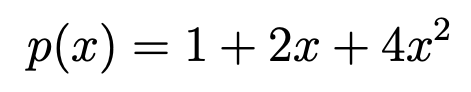

using the parametric model,

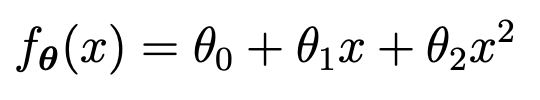

and demostrating the diffent optimiser GD vs RMSprop, to learn the correct values of theta. 

The true extact value of theta are:

theta_0 = 1

theta_1 = 2

theta_2 = 4

**NOTE**: This code is just for experimentation/explanation purposes for my thesis only and is not intended to be a demonstration of my coding ability.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
############################## Models ##############################

In [3]:
# Exact model (function)

def exact(x):
  return 1 + 2 * x + 4 * x**2

In [4]:
# Parametric model

class Quad_Model(keras.Model):
  def __init__(self, *args, **kwargs):
    super(Quad_Model, self).__init__(*args, **kwargs)
    self.theta_0 = tf.Variable(np.random.randn(), name = "theta_0")
    self.theta_1 = tf.Variable(np.random.randn(), name = "theta_1")
    self.theta_2 = tf.Variable(np.random.randn(), name = "theta_2")

  def call(self, x):
    return self.theta_0 + self.theta_1 * x + self.theta_2 * tf.pow(x, 2)

In [5]:
############################## Model Parameters ##############################

In [6]:
# Epochs
epochs = 4

# Number of data points
N = 19200

# Batch Size
batch_size = 64

In [7]:
############################## Creating Training Data ##############################

In [8]:
def creat_train_data(N):
  x_data = np.random.uniform(0.0 , 1.0, N)
  y_data = exact(x_data)
  return x_data, y_data

In [9]:
x_data, y_data = creat_train_data(N)

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_dataset = train_dataset.shuffle(N).batch(batch_size)

In [11]:
############################## Training ##############################

In [12]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [13]:
############################## Gradient Descent ##############################

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [15]:
model = Quad_Model()

In [16]:
# Train over number of epochs
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch + 1}")
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            y_batch_pred = model(x_batch_train)
            loss_value = loss_fn(y_batch_pred, y_batch_train)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 50 == 0:
          print(f"Training loss (for one batch) at batch {step}: {loss_value}")


Start of epoch 1
Training loss (for one batch) at batch 0: 26.9665470123291
Training loss (for one batch) at batch 50: 2.382176160812378
Training loss (for one batch) at batch 100: 0.8581206202507019
Training loss (for one batch) at batch 150: 0.6493193507194519
Training loss (for one batch) at batch 200: 0.5980334877967834
Training loss (for one batch) at batch 250: 0.4343670904636383

Start of epoch 2
Training loss (for one batch) at batch 0: 0.29348164796829224
Training loss (for one batch) at batch 50: 0.23170506954193115
Training loss (for one batch) at batch 100: 0.1790890395641327
Training loss (for one batch) at batch 150: 0.16420994699001312
Training loss (for one batch) at batch 200: 0.11462545394897461
Training loss (for one batch) at batch 250: 0.0856843963265419

Start of epoch 3
Training loss (for one batch) at batch 0: 0.0598163902759552
Training loss (for one batch) at batch 50: 0.06661954522132874
Training loss (for one batch) at batch 100: 0.045534826815128326
Traini

In [17]:
# Trained model predictions of theta_0, theta_1, theta_2

model.trainable_variables

[<tf.Variable 'theta_0:0' shape=() dtype=float32, numpy=0.96219134>,
 <tf.Variable 'theta_1:0' shape=() dtype=float32, numpy=2.6562047>,
 <tf.Variable 'theta_2:0' shape=() dtype=float32, numpy=3.1633744>]

In [18]:
############################## RMSprop ##############################

In [19]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01)

In [20]:
model2 = Quad_Model()

In [21]:
# Train over number of epochs
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch + 1}")
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            y_batch_pred = model2(x_batch_train)
            loss_value = loss_fn(y_batch_pred, y_batch_train)
        grads = tape.gradient(loss_value, model2.trainable_weights)
        optimizer.apply_gradients(zip(grads, model2.trainable_weights))

        if step % 50 == 0:
          print(f"Training loss (for one batch) at batch {step}: {loss_value}")


Start of epoch 1
Training loss (for one batch) at batch 0: 45.35176086425781
Training loss (for one batch) at batch 50: 25.521398544311523
Training loss (for one batch) at batch 100: 22.968841552734375
Training loss (for one batch) at batch 150: 14.053241729736328
Training loss (for one batch) at batch 200: 7.531970024108887
Training loss (for one batch) at batch 250: 3.227058172225952

Start of epoch 2
Training loss (for one batch) at batch 0: 0.9868819117546082
Training loss (for one batch) at batch 50: 0.11515314131975174
Training loss (for one batch) at batch 100: 0.016941558569669724
Training loss (for one batch) at batch 150: 0.00828067772090435
Training loss (for one batch) at batch 200: 0.008360011503100395
Training loss (for one batch) at batch 250: 0.0037738061510026455

Start of epoch 3
Training loss (for one batch) at batch 0: 0.0042961714789271355
Training loss (for one batch) at batch 50: 0.002269109943881631
Training loss (for one batch) at batch 100: 0.0014261553296819

In [22]:
model2.trainable_variables

[<tf.Variable 'theta_0:0' shape=() dtype=float32, numpy=0.99552965>,
 <tf.Variable 'theta_1:0' shape=() dtype=float32, numpy=2.0448809>,
 <tf.Variable 'theta_2:0' shape=() dtype=float32, numpy=3.9630806>]

In [23]:
############################## Ploting ##############################

In [24]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

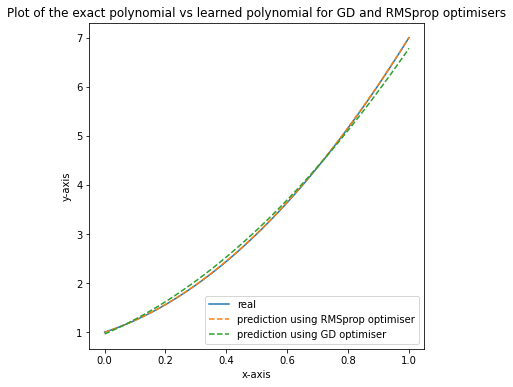

In [25]:
x_plot = np.linspace(0.0, 1.0, 100)

figure(figsize=(6,6))
plt.plot(x_plot, exact(x_plot), label = "real")
plt.plot(x_plot, model2(x_plot), "--", label = "prediction using RMSprop optimiser")
plt.plot(x_plot, model(x_plot), "--", label = "prediction using GD optimiser")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.title("Plot of the exact polynomial vs learned polynomial for GD and RMSprop optimisers")
plt.legend(loc="lower right")
plt.show()

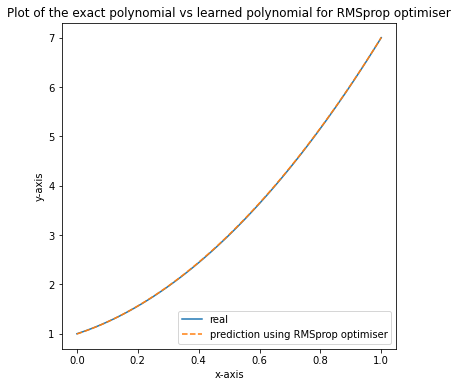

In [26]:
x_plot = np.linspace(0.0, 1.0, 100)

figure(figsize=(6,6))
plt.plot(x_plot, exact(x_plot), label = "real")
plt.plot(x_plot, model2(x_plot), "--", label = "prediction using RMSprop optimiser")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.title("Plot of the exact polynomial vs learned polynomial for RMSprop optimiser")
plt.legend(loc="lower right")
plt.show()

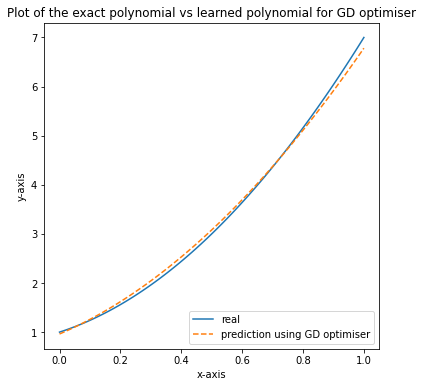

In [27]:
x_plot = np.linspace(0.0, 1.0, 100)

figure(figsize=(6,6))
plt.plot(x_plot, exact(x_plot), label = "real")
plt.plot(x_plot, model(x_plot), "--", label = "prediction using GD optimiser")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.title("Plot of the exact polynomial vs learned polynomial for GD optimiser")
plt.legend(loc="lower right")
plt.show()